In [3]:
try:
    import os
    import tkinter as tk
    from tkinter import filedialog
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import matplotlib.patches as patches
    import tifffile

except ImportError:
    import sys
    # Python version 3.10.12 is the newest version supported
    !{sys.executable} -m pip install --user --upgrade os matplotlib tifffile

Run this if you want to only select a single .tif file.

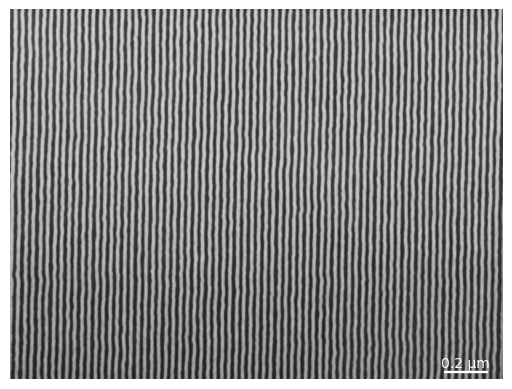

NewSubfileType - FILETYPE.UNDEFINED
ImageWidth - 3072
ImageLength - 2304
BitsPerSample - 8
Compression - COMPRESSION.NONE
PhotometricInterpretation - PHOTOMETRIC.PALETTE
StripOffsets - (12780,)
SamplesPerPixel - 1
RowsPerStrip - 4294967295
StripByteCounts - (7077888,)
XResolution - (1, 1)
YResolution - (1, 1)
ResolutionUnit - RESUNIT.NONE
ColorMap - [[    0   257   514   771  1028  1285  1542  1799  2056 65535  2570  2827
   3084  3341  3598  3855  4112  4369     0  4883  5140  5397  5654  5911
   6168  6425  6682     0  7196  7453  7710  7967  8224  8481  8738  8995
      0  9509  9766 10023 10280 10537 10794 11051 11308 65535 11822 12079
  12336 12593 12850 13107 13364 13621 65535 14135 14392 14649 14906 15163
  15420 15677 15934 32896 16448 16705 16962 17219 17476 17733 17990 18247
      0 18761 19018 19275 19532 19789 20046 20303 20560     0 21074 21331
  21588 21845 22102 22359 22616 22873     0 23387 23644 23901 24158 24415
  24672 24929 25186 32896 25700 25957 26214 26471 26728 

In [9]:
# Create a Tkinter root window
root = tk.Tk()
root.attributes("-topmost", True)
root.withdraw()
root.lift()
root.focus_force()

# Open file explorer dialog
file_path = filedialog.askopenfilename(filetypes=[("TIFF Files", "*.tif"), ("All Files", "*.*")])
SEMDisplay(file_path)

Run this if you want to select all .tif files within a folder.

In [ ]:
# Create a Tkinter root window
root = tk.Tk()
root.attributes("-topmost", True)
root.withdraw()
root.lift()
root.focus_force()

# If you want to select all the .tif images in a folder

# Select the folder containing the .tif images
folder_path = filedialog.askdirectory()

# Get a list of .tif files in the selected folder
tif_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.tif')]

# Load and display the .tif images
for tif_file in tif_files:
    file_path = os.path.join(folder_path, tif_file)
    SEMDisplay(file_path)

In [8]:
#Need to turn this into two seperate functions
def SEMDisplay(file_path):
    # Read the image and metadata using tifffile
    image = tifffile.imread(file_path)
    metadata = tifffile.TiffFile(file_path)

    #Dictionary of all the names and values within the .tif tag
    ImagTagDict = metadata.pages[0].tags["CZ_SEM"].value
    #List containing the proper name, value, and dimension
    PixelList = ImagTagDict.get("ap_image_pixel_size")
    # pixel_name = PixelList[0]
    pixel_value = PixelList[1]
    #pixel_dimension = PixelList[2]

    # Load the image using matplotlib
    image = mpimg.imread(file_path)

    # Plot the image
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    # Calculate the length of the scale bar in micrometers
    scale_bar_length_micrometers = 0.2
    
    # Calculate the dimensions of the scale bar
    image_height = image.shape[0]
    scale_bar_length_pixels = (scale_bar_length_micrometers*(10**6))/pixel_value

    # Calculate the position of the scale bar
    scale_bar_x = image.shape[1] - scale_bar_length_pixels - 100
    scale_bar_y = image_height - 50

    # Add the scale bar to the plot
    scale_bar = patches.Rectangle((scale_bar_x, scale_bar_y), scale_bar_length_pixels, 5, edgecolor='white', facecolor='white')
    plt.gca().add_patch(scale_bar)

    # Add text for the scale bar length
    scale_bar_text = f'{scale_bar_length_micrometers} µm'
    plt.text(scale_bar_x + scale_bar_length_pixels / 2, scale_bar_y - 20, scale_bar_text, color='white', ha='center')

    # Show the plot
    plt.show()

    # Iterate over the tags and print the tag names and associated values
    for tag in metadata.pages[0].tags.values():
        print(tag.name, "-", tag.value)

In [ ]:
ap_image_pixel_size - ('Image Pixel Size', 752.1, 'pm')

In [7]:
# Iterate over the tags and print the tag names and associated values
for tag in metadata.pages[0].tags.values():
    print(tag.name, "-", tag.value)

NameError: name 'metadata' is not defined

In [ ]:
import ipywidgets as widgets

@widgets.interact
def greet(name="World", times=(1, 5)):
    for _ in range(times):
        print("Hello,", name)